In [9]:
string="arn:aws:braket:us-west-1:592242689881:quantum-task/ad7a2d72-61fe-40e4-a1e1-318c1968f527"


import matplotlib.pyplot as plt
import numpy as np

In [2]:
!qbraid disable account qbraid_sdk

 You have already disabled qBraid quantum jobs.


In [3]:
from braket.aws import AwsSession, AwsQuantumTask

# restore task with unique arn
task_load = AwsQuantumTask(arn=string)
# retrieve the result of the task
result = task_load.result()

In [4]:
task_result = result.measurement_counts

# print(task_result.keys())
sortF = dict(sorted(task_result.items(), key=lambda item: item[1]))
res =dict(reversed(list(sortF.items())))

print(res)



{'00011011': 19, '01111111': 17, '00111111': 12, '00110110': 12, '11011111': 11, '00111110': 11, '11111111': 11, '11010111': 11, '01010111': 11, '01011111': 10, '00011111': 10, '01010011': 10, '01110111': 10, '11010110': 9, '01010100': 9, '01111110': 9, '01011100': 9, '00100111': 9, '01111101': 9, '01011010': 9, '11101111': 9, '00111101': 8, '01010101': 8, '11011100': 8, '01110110': 8, '01000111': 8, '11110111': 8, '11111101': 8, '10010110': 8, '01011110': 8, '01101111': 7, '01110101': 7, '10100100': 7, '00111011': 7, '01001100': 7, '00010011': 7, '01011101': 7, '10111111': 7, '11001111': 7, '10110110': 7, '00100100': 7, '11110101': 7, '01010000': 7, '00000110': 7, '00110111': 7, '00101111': 7, '01100111': 7, '11010011': 6, '01001011': 6, '01011001': 6, '11111100': 6, '00110011': 6, '00001011': 6, '01010110': 6, '00011110': 6, '00011010': 6, '00110100': 6, '00000011': 6, '10011110': 6, '11111110': 6, '01010010': 6, '01111001': 6, '00010111': 6, '01111011': 5, '10111101': 5, '11010010':

In [12]:


import networkx as nx


graph = nx.Graph()
graph.add_nodes_from([0,1,2,3,4])
graph.add_edges_from([(0, 4), (0, 3), (0, 2), (1, 2), (1, 4), (1, 3), (2, 4), (3, 4)])


In [13]:
# get the best one:
solution_vis=[]
oneSolution =   list(res)[0]

# convert it to the form we need:
# we need to keep in mind that the qubits are reversed here!
solution = [4]
i = 7
for _ in range(2):
    val = (int)(oneSolution[i])*2+(int)(oneSolution[i-1])
    i=i-2
    solution.append(val)

# to construct the solution we add the remaining nodes on the already established rule
# they have the same starting bit as the ones from one bit before and have different second-bit value 

i = 7
for _ in range(2):
    solution.append((int)(oneSolution[i])*2+(1-(int)(oneSolution[i-1])))
    i=i-2

solution.append(4)

solution_vis.append(solution)

print(solution)


[4, 3, 1, 2, 0, 4]


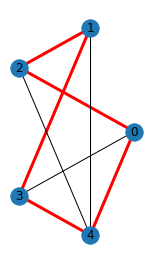

In [14]:
f = plt.figure(figsize=(20,20))
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
plotC = 1

edges_g = [(0, 4), (0, 3), (0, 2), (1, 2), (1, 4), (1, 3), (2, 4), (3, 4)]

pos = {0: (50, 50), 1: (50, 40), 2: (20, 20), 3: (20, 30), 4: (30, 30)}

for sol in solution_vis:
    graph_copy = nx.Graph()
    graph_copy.add_nodes_from(pos.keys())
   
    for i in range(len(sol)-1):
        graph_copy.add_edge(sol[i],sol[i+1],color='red', weight=3)
    for (x, y) in edges_g:
        if not graph_copy.has_edge(x, y):
            graph_copy.add_edge(x,y,color='black', weight=1)
    
    edges = graph_copy.edges()
    colors = [graph_copy[u][v]['color'] for u,v in edges]
    weights = [graph_copy[u][v]['weight'] for u,v in edges]
    
    nodePos = nx.circular_layout(graph_copy)
    plt.subplot(4, 6, plotC)
    plotC+=1
    # pos = nx.random_layout(graph_copy)
    # nx.draw(graph_copy, with_labels=True)
    nx.draw(graph_copy, edge_color=colors, pos=nodePos, width=weights, with_labels = True)
    if plotC > 24:
        break
    
    


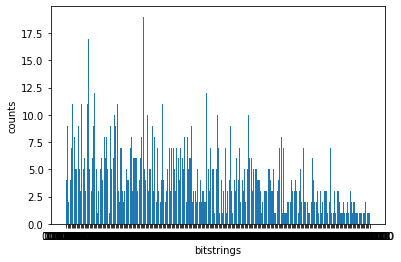

In [15]:
plt.bar(task_result.keys(), task_result.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');